In [3]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [4]:
# Reading the saved data pickle file
data = pd.read_excel('TCSData.xlsx')
data.set_index('Date', inplace=True)
print(data.head(10))
data.describe()
data.dtypes

                                                         news  Day  \
Date                                                                 
2019-01-02  TCS to announce Dec quarter results on January 10  Wed   
2018-11-29  US lawsuit win: TCS says will continue to inve...  Thu   
2018-11-27  Nifty IT Index poised for a pullback rally; bu...  Tue   
2018-11-01              TCS acquires London-based W12 Studios  Thu   
2018-10-31  Tatas, TCS violated rules in sacking Cyrus Mis...  Wed   
2018-10-30  In Jet Airways, N Chandrasekaran sees his visi...  Tue   
2018-10-26  Huawei expects 60% growth in enterprise biz ne...  Fri   
2018-10-23  India's TCS among top 10 firms to get foreign ...  Tue   
2018-10-12  Buy or sell: Top stock trading ideas by market...  Fri   
2018-10-10      Top 20 stocks to buy ahead of earnings season  Wed   

            loss/profit  loss/profit%  
Date                                   
2019-01-02            1      0.960630  
2018-11-29            0     -1.825238  

news             object
Day              object
loss/profit       int64
loss/profit%    float64
dtype: object

In [5]:
df_stocks = data[['loss/profit%', 'news']]
df_stocks

,loss/profit%,news
Date,,
2019-01-02,0.960630,TCS to announce Dec quarter results on January 10
2018-11-29,-1.825238,US lawsuit win: TCS says will continue to inve...
2018-11-27,1.955232,Nifty IT Index poised for a pullback rally; bu...
2018-11-01,-0.406452,TCS acquires London-based W12 Studios
2018-10-31,2.007895,"Tatas, TCS violated rules in sacking Cyrus Mis..."
2018-10-30,1.489020,"In Jet Airways, N Chandrasekaran sees his visi..."
2018-10-26,-2.955931,Huawei expects 60% growth in enterprise biz ne...
2018-10-23,-2.349047,India's TCS among top 10 firms to get foreign ...
2018-10-12,-3.018200,Buy or sell: Top stock trading ideas by market...


In [6]:
df = df_stocks[['loss/profit%']].copy()
df

,loss/profit%
Date,
2019-01-02,0.960630
2018-11-29,-1.825238
2018-11-27,1.955232
2018-11-01,-0.406452
2018-10-31,2.007895
2018-10-30,1.489020
2018-10-26,-2.955931
2018-10-23,-2.349047
2018-10-12,-3.018200


In [7]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [8]:
df

,loss/profit%,compound,neg,neu,pos
Date,,,,,
2019-01-02,0.960630,,,,
2018-11-29,-1.825238,,,,
2018-11-27,1.955232,,,,
2018-11-01,-0.406452,,,,
2018-10-31,2.007895,,,,
2018-10-30,1.489020,,,,
2018-10-26,-2.955931,,,,
2018-10-23,-2.349047,,,,
2018-10-12,-3.018200,,,,


In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'news'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df_stocks.loc[Date, 'news'])
        print(date)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shanthi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\shanthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shanthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\shanthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\shanthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is depreca

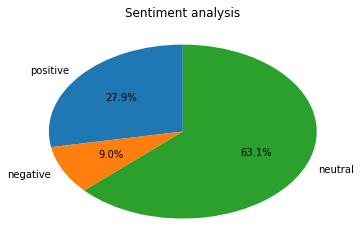

In [34]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 4) for article in df_stocks['news']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

cnt=[sentiment_category_tb.count('positive'),sentiment_category_tb.count('negative'),sentiment_category_tb.count('neutral')]
labels=['positive','negative','neutral']
plt.pie(cnt,labels=labels,startangle=90,autopct='%1.1f%%')
plt.title('Sentiment analysis')
plt.show()


In [8]:
df

,loss/profit%,compound,neg,neu,pos
Date,,,,,
2019-01-02,0.960630,0,0,1,0
2018-11-29,-1.825238,0.7003,0.06,0.728,0.212
2018-11-27,1.955232,0.5719,0,0.63,0.37
2018-11-01,-0.406452,0,0,1,0
2018-10-31,2.007895,-0.5267,0.236,0.764,0
2018-10-30,1.489020,0.25,0,0.857,0.143
2018-10-26,-2.955931,0.3818,0,0.755,0.245
2018-10-23,-2.349047,0.2023,0,0.878,0.122
2018-10-12,-3.018200,0.5719,0,0.749,0.251


In [9]:
train_start_date = '2005-01-11'
train_end_date = '2015-10-01'
test_start_date = '2015-10-05'
test_end_date = '2019-01-02'
new_index=pd.date_range(start='2005-01-11', end='2019-01-02')
print(new_index)
df.reindex(new_index, fill_value=0)
print(df)
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]
train

DatetimeIndex(['2005-01-11', '2005-01-12', '2005-01-13', '2005-01-14',
               '2005-01-15', '2005-01-16', '2005-01-17', '2005-01-18',
               '2005-01-19', '2005-01-20',
               ...
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
               '2019-01-01', '2019-01-02'],
              dtype='datetime64[ns]', length=5105, freq='D')
            loss/profit% compound    neg    neu    pos
Date                                                  
2019-01-02      0.960630        0      0      1      0
2018-11-29     -1.825238   0.7003   0.06  0.728  0.212
2018-11-27      1.955232   0.5719      0   0.63   0.37
2018-11-01     -0.406452        0      0      1      0
2018-10-31      2.007895  -0.5267  0.236  0.764      0
2018-10-30      1.489020     0.25      0  0.857  0.143
2018-10-26     -2.955931   0.3818      0  0.755  0.245
2018-10-23     -2.349047   0.2023      0  0.878  0.122

,loss/profit%,compound,neg,neu,pos
Date,,,,,


In [10]:
test = df.iloc[0 : 267]
train = df.iloc[267:1267]
train

,loss/profit%,compound,neg,neu,pos
Date,,,,,
2015-10-08,-1.355805,0.2263,0.136,0.678,0.186
2015-10-07,-1.484809,0,0,1,0
2015-10-06,-0.917431,0,0,1,0
2015-10-05,2.222264,0.802,0,0.762,0.238
2015-10-01,1.754521,0.5574,0,0.795,0.205
2015-09-28,-0.011565,0,0,1,0
2015-09-23,-0.065107,0,0,1,0
2015-09-16,-0.181996,0.4404,0,0.775,0.225
2015-09-15,-0.158721,0,0,1,0


In [11]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [12]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [13]:
y_train = pd.DataFrame(train['loss/profit%'])
y_test = pd.DataFrame(test['loss/profit%'])

In [14]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(numpy_df_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
print(rf.feature_importances_)

[0.3464333  0.12959084 0.28560307 0.2383728 ]


In [16]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [17]:
prediction

array([[-0.03767214],
       [ 0.31914498],
       [ 1.41604193],
       [-0.03767214],
       [-0.20371291],
       [ 0.67414952],
       [-0.73045744],
       [ 0.49983344],
       [-0.95415568],
       [ 0.86318474],
       [-1.30489405],
       [ 0.79304287],
       [-0.03767214],
       [ 1.04523469],
       [ 0.96545289],
       [ 0.53951637],
       [-0.26838957],
       [-0.74887394],
       [-0.03767214],
       [-0.03767214],
       [-0.85390505],
       [-0.03767214],
       [-0.03767214],
       [ 0.28116238],
       [-0.13736043],
       [ 1.29199483],
       [-0.47823831],
       [ 0.49983344],
       [-0.2279701 ],
       [ 0.09192926],
       [ 0.667967  ],
       [-0.78291434],
       [-0.03767214],
       [ 1.40267724],
       [ 0.09996054],
       [-0.13187078],
       [-0.03767214],
       [-0.03767214],
       [-0.63745941],
       [-0.03767214],
       [ 0.61994756],
       [ 0.24109094],
       [-1.55859576],
       [ 0.01925857],
       [-0.36074742],
       [ 0

In [18]:
contributions

array([[-0.03717314,  0.01376805,  0.05045782, -0.02302611],
       [ 0.34366272,  0.1016972 ,  0.02032978, -0.10484597],
       [ 0.44376593,  0.0277868 ,  0.27999662,  0.70619132],
       ...,
       [ 0.45381975,  1.90454649,  3.16258433,  0.01112277],
       [ 0.27712096,  0.01912145,  0.36202336,  0.51310737],
       [ 0.43782825, -0.45671999, -0.0604977 , -0.05725686]])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
idx = df.iloc[0:267].index.tolist()
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['loss/profit%'])

In [21]:
predictions_df

,loss/profit%
2019-01-02,-0.037672
2018-11-29,0.319145
2018-11-27,1.416042
2018-11-01,-0.037672
2018-10-31,-0.203713
2018-10-30,0.674150
2018-10-26,-0.730457
2018-10-23,0.499833
2018-10-12,-0.954156
2018-10-10,0.863185


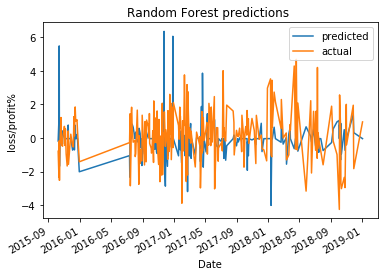

In [22]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.rename(columns={"loss/profit%": "predicted"}).plot(title='Random Forest predictions ')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("loss/profit%")
fig = y_test.rename(columns={"loss/profit%": "actual"}).plot(ax = predictions_plot).get_figure()
#fig.savefig("graphs/random forest without smoothing.png")

In [23]:
test

,loss/profit%,compound,neg,neu,pos
Date,,,,,
2019-01-02,0.960630,0,0,1,0
2018-11-29,-1.825238,0.7003,0.06,0.728,0.212
2018-11-27,1.955232,0.5719,0,0.63,0.37
2018-11-01,-0.406452,0,0,1,0
2018-10-31,2.007895,-0.5267,0.236,0.764,0
2018-10-30,1.489020,0.25,0,0.857,0.143
2018-10-26,-2.955931,0.3818,0,0.755,0.245
2018-10-23,-2.349047,0.2023,0,0.878,0.122
2018-10-12,-3.018200,0.5719,0,0.749,0.251


# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [24]:
predictions_df

,loss/profit%
2019-01-02,-0.037672
2018-11-29,0.319145
2018-11-27,1.416042
2018-11-01,-0.037672
2018-10-31,-0.203713
2018-10-30,0.674150
2018-10-26,-0.730457
2018-10-23,0.499833
2018-10-12,-0.954156
2018-10-10,0.863185


In [25]:
predictions_df['ewma'] = predictions_df.ewm(span=20).mean()

In [26]:
predictions_df

,loss/profit%,ewma
2019-01-02,-0.037672,-0.037672
2018-11-29,0.319145,0.149657
2018-11-27,1.416042,0.614666
2018-11-01,-0.037672,0.426346
2018-10-31,-0.203713,0.273940
2018-10-30,0.674150,0.358366
2018-10-26,-0.730457,0.152496
2018-10-23,0.499833,0.212535
2018-10-12,-0.954156,0.025392
2018-10-10,0.863185,0.151557


In [27]:
predictions_df['actual_value'] = test['loss/profit%']
temp= test['loss/profit%']
predictions_df['actual_value_ewma'] = temp.ewm( span=20).mean()

In [28]:
predictions_df

,loss/profit%,ewma,actual_value,actual_value_ewma
2019-01-02,-0.037672,-0.037672,0.960630,0.960630
2018-11-29,0.319145,0.149657,-1.825238,-0.501951
2018-11-27,1.416042,0.614666,1.955232,0.400312
2018-11-01,-0.037672,0.426346,-0.406452,0.167412
2018-10-31,-0.203713,0.273940,2.007895,0.612609
2018-10-30,0.674150,0.358366,1.489020,0.797492
2018-10-26,-0.730457,0.152496,-2.955931,0.087812
2018-10-23,0.499833,0.212535,-2.349047,-0.333411
2018-10-12,-0.954156,0.025392,-3.018200,-0.764064
2018-10-10,0.863185,0.151557,-2.685714,-1.053448


In [29]:
# Changing column names
predictions_df.columns = ['predicted_%change', 'average_predicted_%change', 'actual_%change', 'average_actual_%change']

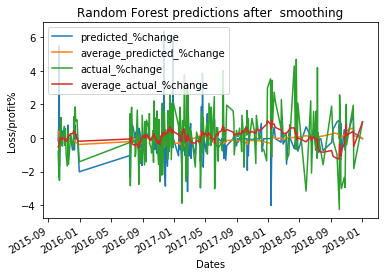

In [30]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predictions after  smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Loss/profit%")
fig = predictions_plot.get_figure()
#fig.savefig("graphs/random forest after smoothing.png")


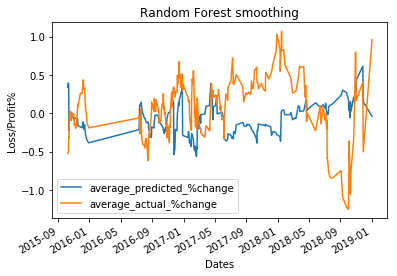

In [31]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_%change', 'average_actual_%change']]
predictions_plot = predictions_df_average.plot(title='Random Forest smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Loss/Profit%")
fig = predictions_plot.get_figure()
#fig.savefig("graphs/random forest after smoothing 2.png")

# Linear Regression

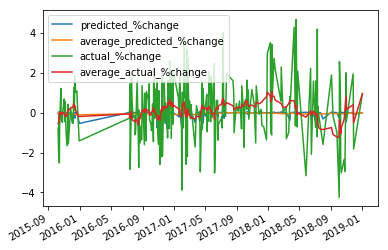

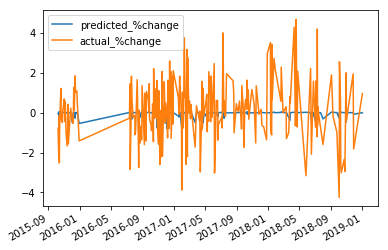

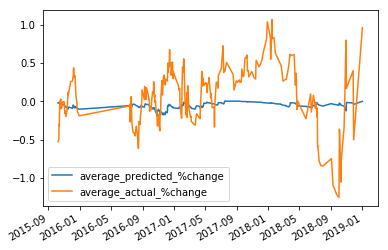

In [36]:
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
# Generating models
lr = LinearRegression()
lr.fit(numpy_df_train, train['loss/profit%'])
    

prediction = lr.predict(numpy_df_test)
    
idx = df.iloc[0:267].index.tolist()

predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['loss/profit%'])
    

# Smoothing the plot
predictions_df_list['ewma'] = predictions_df_list.ewm(span=20).mean()
predictions_df_list['actual_value'] = test['loss/profit%']
temp= test['loss/profit%']
predictions_df_list['actual_value_ewma'] = temp.ewm(span=20).mean()
# Changing column names
predictions_df_list.columns = ['predicted_%change', 'average_predicted_%change', 'actual_%change', 'average_actual_%change']
predictions_df_list.plot()
predictions_df = predictions_df_list[['predicted_%change', 'actual_%change']]
predictions_df.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_%change', 'average_actual_%change']]
predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

# MLP Regression

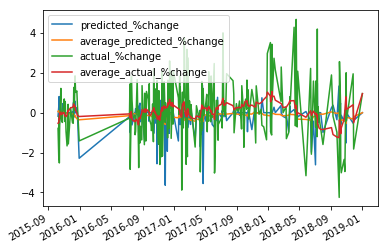

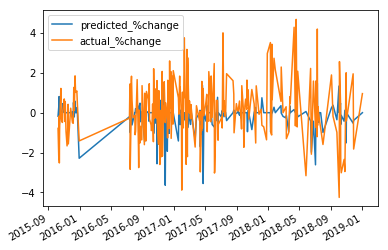

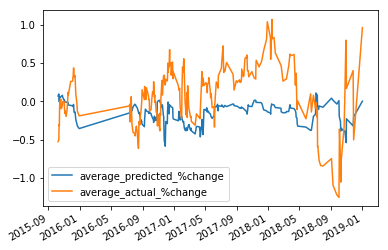

In [32]:
from sklearn.neural_network import MLPRegressor
from datetime import datetime, timedelta
# Generating models
mlpc =  MLPRegressor(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc.fit(numpy_df_train, train['loss/profit%'])   
prediction = mlpc.predict(numpy_df_test)
    
idx = df.iloc[0:267].index.tolist()

predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['loss/profit%'])
    

# Smoothing the plot
predictions_df_list['ewma'] = predictions_df_list.ewm(span=20).mean()
predictions_df_list['actual_value'] = test['loss/profit%']
temp= test['loss/profit%']
predictions_df_list['actual_value_ewma'] = temp.ewm(span=20).mean()
# Changing column names
predictions_df_list.columns = ['predicted_%change', 'average_predicted_%change', 'actual_%change', 'average_actual_%change']
predictions_df_list.plot()
predictions_df = predictions_df_list[['predicted_%change', 'actual_%change']]
predictions_df.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_%change', 'average_actual_%change']]
predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    